1.Exploring and processing the data

In [42]:
import pandas as pd

In [43]:
df=pd.read_csv(r"C:\Users\ShibuKumar\Downloads\Datas\housepricedata.csv")
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [44]:
dataset=df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [45]:
X=dataset[:,0:10]
Y=dataset[:,10]

In [46]:
Y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [47]:
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [48]:
from sklearn.model_selection import train_test_split
#In ths comment, 30% your val_and_test size 
X_train,X_val_and_test,Y_train,Y_val_and_test = train_test_split(X_scale,Y,test_size=0.3)
#In this comment, 50% your validation and test data from X_val_and_Test,Y_val_and_Test
X_val,X_test,Y_val,Y_test = train_test_split(X_val_and_test,Y_val_and_test,test_size=0.5)

In [49]:
print(X_train.shape,X_test.shape,X_val.shape,Y_train.shape,Y_test.shape,Y_val.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


2.Building and Training our First Neural Network

First Step: Setting up the Architecture

In [50]:
from keras.models import Sequential
from keras.layers import Dense

In [51]:
#We bulid a Keras sequentail model
model=Sequential([
    Dense(32,activation="relu",input_shape=(10,)),
    Dense(32,activation="relu"),
    Dense(1,activation="sigmoid"),
])

C:\Users\ShibuKumar\AppData\Local\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Second Step: Filling in the best numbers

In [52]:
#Configuring the model
model.compile(optimizer="sgd",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [53]:
#Train the data
hist = model.fit(X_train,Y_train,
                 batch_size=32,epochs=100,
                 validation_data=(X_val,Y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5066 - loss: 0.6914 - val_accuracy: 0.4749 - val_loss: 0.6957
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5123 - loss: 0.6866 - val_accuracy: 0.4749 - val_loss: 0.6890
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5381 - loss: 0.6742 - val_accuracy: 0.4749 - val_loss: 0.6829
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5248 - loss: 0.6704 - val_accuracy: 0.4749 - val_loss: 0.6776
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5380 - loss: 0.6651 - val_accuracy: 0.4886 - val_loss: 0.6726
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5449 - loss: 0.6634 - val_accuracy: 0.5068 - val_loss: 0.6678
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5660 - loss: 0.6559 - val_accuracy: 0.5251 - val_loss: 0.6632
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5817 - loss: 0.6549 - val_accuracy: 0.5479 - v

In [54]:
#We can evaluate it on the test set.
model.evaluate(X_test,Y_test)[1]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8883 - loss: 0.2923  


0.8858447670936584

3.Visualizing Loss and Accuracy

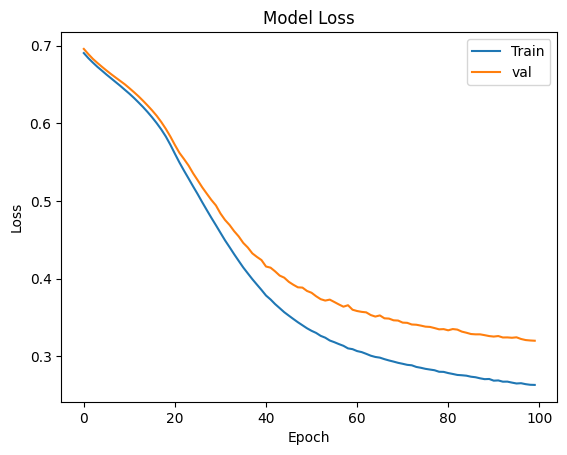

In [55]:
#Visualizing loss
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc="upper right")
plt.show()

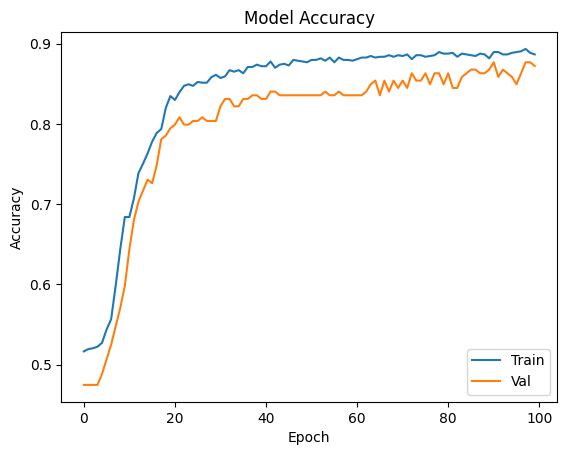

In [56]:
#visualizing the accuracy
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Val"],loc="lower right")
plt.show()         

4.Adding Regularization to our Neural Network

In [57]:
model_2 = Sequential([
    Dense(1000,activation="relu",input_shape=(10,)),
    Dense(1000,activation="relu"),
    Dense(1000,activation="relu"),
    Dense(1,activation="sigmoid"),
])

In [58]:
model_2.compile(optimizer="adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])

In [59]:
hist_2 = model_2.fit(X_train,Y_train,
                     batch_size=32, epochs=100,
                     validation_data=(X_val,Y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6974 - loss: 0.5089 - val_accuracy: 0.8356 - val_loss: 0.3810
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8564 - loss: 0.3374 - val_accuracy: 0.8721 - val_loss: 0.3520
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8909 - loss: 0.2752 - val_accuracy: 0.8858 - val_loss: 0.3082
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8871 - loss: 0.2743 - val_accuracy: 0.8584 - val_loss: 0.3253
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8930 - loss: 0.2470 - val_accuracy: 0.8676 - val_loss: 0.3259
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8856 - loss: 0.2648 - val_accuracy: 0.8813 - val_loss: 0.3071
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9007 - loss: 0.2248 - val_accuracy: 0.8721 - val_loss: 0.3031
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9128 - loss: 0.2047 - val_accuracy: 0.

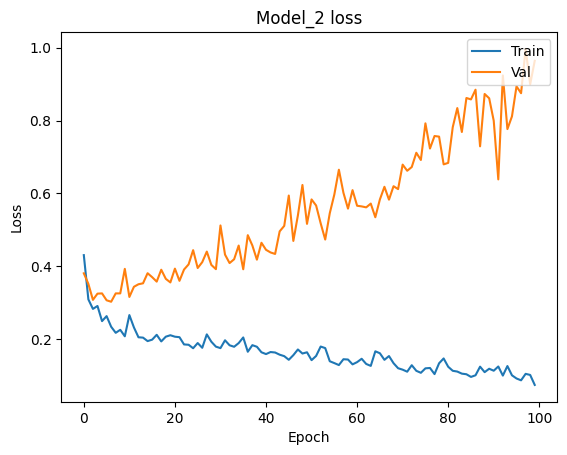

In [60]:
plt.plot(hist_2.history["loss"])
plt.plot(hist_2.history["val_loss"])
plt.title("Model_2 loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Val"],loc="upper right")
plt.show()
         

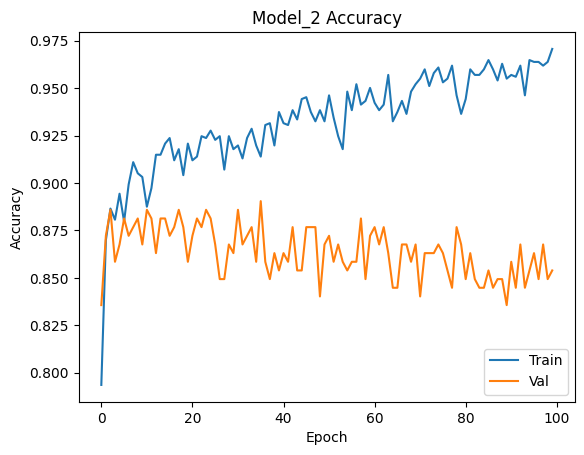

In [61]:
plt.plot(hist_2.history["accuracy"])
plt.plot(hist_2.history["val_accuracy"])
plt.title("Model_2 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Val"],loc="lower right")
plt.show()

First, let’s import the code that we need for L2 regularization and dropout:

In [62]:
from keras.layers import Dropout
from keras import regularizers

In [63]:
model_3 = Sequential([
    Dense(1000,activation="relu",kernel_regularizer=regularizers.l2(0.01),input_shape=(10,)),
    Dropout(0.3),
    Dense(1000,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1,activation="sigmoid",kernel_regularizer=regularizers.l2(0.01)),
])

In [64]:
model_3.compile(optimizer="adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])

In [65]:
hist_3 = model_3.fit(X_train,Y_train,
                     batch_size=32,epochs=100,
                     validation_data=(X_val,Y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.5679 - loss: 21.1228 - val_accuracy: 0.6347 - val_loss: 3.9387
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7925 - loss: 2.4768 - val_accuracy: 0.8037 - val_loss: 0.7396
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8591 - loss: 0.6172 - val_accuracy: 0.8539 - val_loss: 0.5376
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8860 - loss: 0.4959 - val_accuracy: 0.8402 - val_loss: 0.5144
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8837 - loss: 0.4843 - val_accuracy: 0.8584 - val_loss: 0.5020
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8981 - loss: 0.4524 - val_accuracy: 0.8539 - val_loss: 0.4950
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8960 - loss: 0.4454 - val_accuracy: 0.8721 - val_loss: 0.4943
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8753 - loss: 0.4769 - val_accuracy: 0

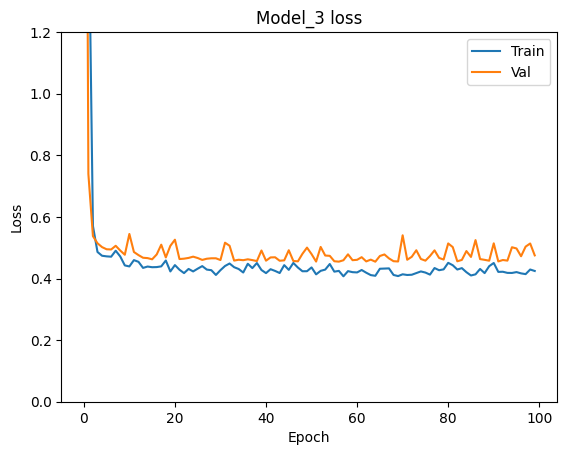

In [70]:
plt.plot(hist_3.history["loss"])
plt.plot(hist_3.history["val_loss"])
plt.title("Model_3 loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Val"],loc="upper right")
plt.ylim(top=1.2,bottom=0)
plt.show()

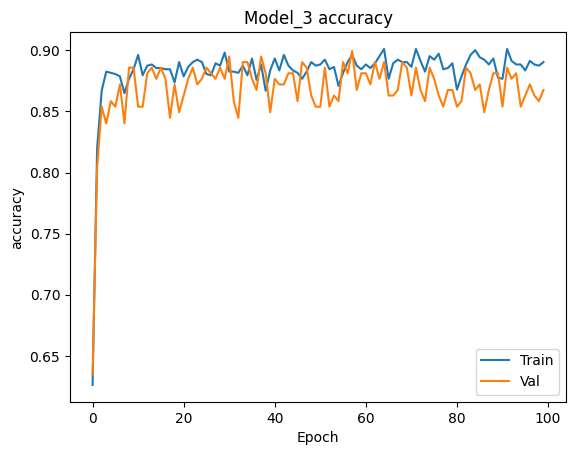

In [71]:
plt.plot(hist_3.history["accuracy"])
plt.plot(hist_3.history["val_accuracy"])
plt.title("Model_3 accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend(["Train","Val"],loc="lower right")
plt.show()